In [2]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from PrettyTable import PrettyTable
from functools import partial
from PrettyFigure import PrettyFigure
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

results = {}

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

# Arbeitsgrundlagen

In diesem Versuch soll die Schallgeschindigkeit in Gasen mittels Laufzeitmessung sowie Bestimmung der Resonanzfrequenz des Schalls bestimmt werden.
Es werden ausschliesslich Longitudinalwellen am einen Ende des Mediums in welchem gemessen wird ausgesandt und am anderen Ende aufgefangen.

## Phasengeschwindigkeit von Shallwellen in Gasen

Die Schallgeschwindigkeit $c$ in idealen Gasen ist eine Funktion die nur von der Temperatur abhängig ist. Unter Annahme der isentropen Kompression und Dekompression mit dem Koeffizienten $\kappa$, der molaren Gaskonstante $R_m$ und der Molmasse $M_m$ erhält man die Formel \ref{eq:Schallgeschwindigkeit}

\begin{equation}
c = \sqrt{\kappa\frac{s}{t}T}
\label{eq:Schallgeschwindigkeit}
\end{equation}

$R_m$ ist dabei immer 8.314 $\frac{kJ}{kmol\cdot K}$. Mit $R_m$ lässt sich für viele Gase die Schallgeschwindigkeit berechnen, welche mit den Messwerten gut übereinstimmt.
Den Isentropenkoeffizienten $\kappa$ kann der Theorie des Dozenten oder Tabellen entnommen werden. 
$\kappa$ kann jedoch auch von der Temperatur abhängen, weswegen experimentelle Daten vorzuziehen sind.

## Schallgeschwindigkeit in einem Gasgemisch

Um die spezifische Schallgeschwindigkeit in einem Gasgemisch zu bestimmen, müssen $\kappa$ und $R_i$ umgerechnet werden.
Hier geht man von den Definitionen \ref{eq:kappa} und \ref{eq:Schallgeschwindigkeit} aus.

\begin{equation}
\kappa = \frac{c_p}{c_v}
\label{eq:kappa}
\end{equation}

Dies führt zu \ref{eq:v_spez}.

\begin{equation}
c = \sqrt{{\kappa}^*{R_i}^*T} = \sqrt{
\frac{\sum m_j\cdot c_{p, j}}{\sum m_j\cdot c_{v, j}}\frac{\sum m_j\cdot R_{i, j}}{\sum m_j}T}
\label{eq:v_spez}
\end{equation}

Im Experiment wird das Gasgemisch jedoch nicht über die Einfüllmassen $m_j$ sondern den jeweiligen Partialdruck $p_j$ beziehungsweise über den relativen Partialdruck $p_{rel, j} = \frac{p_j}{p_{tot}}$ bestimmt. Somit gilt für ideale Gase die Relation in \ref{eq:m_p}.

\begin{equation}
m_j \propto p_j \cdot M_{m, j} \propto p_{rel, j} \cdot M_{m, j}
\label{eq:m_p}
\end{equation}

Und natürlich gilt für jedes Gasgemisch die Relation $p_{rel, 2} = 1 - p_{rel, 1}$.

## Stehende Wellen in einem Rohr

Durch das Begrenzen einer Welle in einem Medium, in diesem Versuch sind das Schallwellen in Gasen in einem Zylinder, werden Reflexionen hervorgerufen. Wenn die Randbedingungen, sprich die Länge des Rohres, bzw die passenden Frequenzen des Schalls dazu , gut gewählt werden, dann entsteht konstruktive Interferenz.
Natürlich kann dabei auch destruktive Interferenz ausgelöst werden, so dass die Wellen ganz verschwinden. Wenn konstruktive Interferenz herrscht, so spricht man von einer stehenden Welle. Die Amplitude dieser Stehwelle ist abhängig von der Dämpfung, beziehungsweise der Güte Q des Resonators, welche das Verhältnis zwischen Anregeamplitude und Resonanzamplitude darstellt.

![Stehende Wellen](images/Stehende_Wellen.png)

Für ein offenes Rohr gelten die in \ref{eq:rohr_offen_1} und \ref{eq:rohr_offen_1} ersichtlichen Formeln.

\begin{equation}
L = n \cdot \frac{\lambda}{2}
\label{eq:rohr_offen_1}
\end{equation}

\begin{equation}
f_n = n \cdot \frac{c}{2L}
\label{eq:rohr_offen_2}
\end{equation}

Für ein geschlossenes Rohr gelten die in \ref{eq:rohr_geschlossen_1} und \ref{eq:rohr_geschlossen_2} ersichtlichen Formeln.

\begin{equation}
L = \frac{\lambda}{4} + n \cdot \frac{\lambda}{2}
\label{eq:rohr_geschlossen_1}
\end{equation}

\begin{equation}
f_n = \frac{c}{4L} (1 + 2n)
\label{eq:rohr_geschlossen_2}
\end{equation}

Wobei $L$ die Länge des Rohres, $f_n$ die Eigenfrequenz. $c$ die Schallgeschwindigkeit $\lambda$ die Wellenlänge und $n$ ein ganzzahliger Faktor sind.

# Durchführung

Die Versuchumgebung besteht aus einem doppelwandigen, luftdicht verschlossenen Messingrohr R. Auf einer Seite des Rohres ist im Inneren ein Lautsprecher L und gegenüberliegend ein Kondensatormikrofon KM montiert. Um die Schallgeschwindigkeiten bei verschiedenen Distanzen bestimmen zu können, kann die Wand, an welcher das KM angebracht ist, per Handkurbel verstellt werden. Die Temperatur im Inneren kann durch ein Chromel-Alumel-Thermoelement bestimmt werden. Zudem gibt es natürlich ein Einlassventil sowie ein Ablassventil.

Die genaue Versuchsanordng kann der nachstehenden Illustration entnommen werden.

![Versuchsanordnung](images/Versuchsanordnung.png)

## Laufzeitmessung

Die Versuchsanornung zur bestimmung der Schallgeschwindigkeit mithilfe der Laufzeitmethode kann der folgenden Abbildung entnommen werden.

![Versuchsanordnung zur Laufzeitbestimmung](images/Laufzeitmessung.png)

Um kurze, steile Schallimpulse zu erzeugen, wird ein Kondensator C per Drucktaster über dem Lautsprecher L entladen. Zeitgleich wird dem Zeitmesser signalisiert dass er die Zeitmessung starten soll. Das Kondensatormikrofon wird dann nach einiger Zeit und genügend Verstärkung im Audioverstärker den Impuls aufnehmen und dem Zeitmesser das Signal die Zeit zu stoppen geben.

Zur Kontrolle der Funktionalität steht ein Oszilloskop bereit auf welchem die Impulse beobachtet werden können. Diese sollten in etwa wie in folgender Abbildung aussehen.

![Oszilloskop mit Impulsen](images/Oszi.png)

## Resonanzmethode

Nachfolgend ist die Versuchsanornung zur Resonanzbestimmung zu sehen.

![Versuchsanordnung zur Resonanzbestimmung](images/Resonanzmethode.png)

Zur bestimmung der Resonanz wird der Impulsgeber aus der Laufzeitmessung durch einen Sinusgenerator ersetzt. Nun sendet der Lautsprecher kontinuierlich Wellen in das Rohr. Auf dem Oszilloskop wird das ausgesendete Signal mit dem empfangenen Signal im XY-Modus in Relation gestellt. Logischerweise müsste bei Resonanz die Verstärkung des Resonators linear sein und auf dem Oszilloskop eine Linie zu sehen sein. Ist noch eine Ellipse sichtbar, so herrscht noch hysterese und es ist noch keine vollkommen konstruktive Interferenz.
Nun kann mithilfe der Handkurbel die Distanz des Mikrofons zum Lautsprecher verstellt werden. Dadurch kann die Distanz wischen zwei Wellenbergen gemessen werden.

## Gasgemische

Beide Methodiken wurden mit reiner Luft und je Helium und SF6 angewandt.
Zudem wurden dann die Gase Helium und SD6 in 20% schritten vermischt und gemessen.
Der Anteil konnte einfach über den Druck im Behälter eingestellt werden, da dieser wie in \ref{eq:m_p} dargestellt direkt proportional zu den Molekülen des Gases ist.

## Konstanten

Die nachfolgenden Konstanten sind alle in Horst Kuchlings Taschenbuch der Physik zu finden.

In [3]:
# Constants

name = ['Luft', 'Helium']
mm = [28.95, 4.00]
ri = [287, 2078, 56.92]
cp = [1.01, 5.23, 0.66]
cv = [0.72, 3.21, 0.096]
k = [1.63, 1.40]
c0 = [971, 344]

constants_tbl = PrettyTable(
    list(zip(name, mm, ri, cp, cv, k, c0)),
    label='tab:gase',
    caption='Kennwerte und Konstanten der verwendeten Gase.',
    extra_header=[
        'Gas',
        r'$M_m[\frac{g}{mol}]$',
        r'$R_i[\frac{J}{kg K}]$',
        r'$c_p[\frac{kJ}{kg K}]$',
        r'$c_v[\frac{kJ}{kg K}]$',
        r'$K$',
        r'$c_0[\frac{m}{s}]$'
    ], entries_per_column=3)
constants_tbl.show()

Gas,$M_m[\frac{g}{mol}]$,$R_i[\frac{J}{kg K}]$,$c_p[\frac{kJ}{kg K}]$,$c_v[\frac{kJ}{kg K}]$,$K$,$c_0[\frac{m}{s}]$
Luft,28.95,287,1.01,0.72,1.63,971
Helium,4.0,2078,5.23,3.21,1.4,344


## Verwendete Messgeräte

In [5]:
# Utilities

name = ['Oszilloskop', 'Zeitmesser', 'Funktionsgenerator', 'Verstärker', 'Vakuumpumpe', 'Netzgerät', 'Temperaturmessgerät']
manufacturer = ['LeCroy', 'Keithley', 'HP', 'WicTronic', 'Pfeiffer', ' ', ' ']
device = ['9631 Dual 300MHz Oscilloscope 2.5 GS/s', '775 Programmable Counter/Timer', '33120A 15MHz Waveform Generator', 'Zweikanalverstärker', 'Vacuum', ' ', ' ']

utilities_tbl = PrettyTable(
    list(zip(name, manufacturer, device)),
    label='tab:utilities',
    caption='Verwendete Gerätschaften',
    extra_header=[
        'Funktion',
        'Hersteller',
        'Gerätename',
    ], entries_per_column=7)
utilities_tbl.show()

Funktion,Hersteller,Gerätename
Oszilloskop,LeCroy,9631 Dual 300MHz Oscilloscope 2.5 GS/s
Zeitmesser,Keithley,775 Programmable Counter/Timer
Funktionsgenerator,HP,33120A 15MHz Waveform Generator
Verstärker,WicTronic,Zweikanalverstärker
Vakuumpumpe,Pfeiffer,Vacuum
Netzgerät,,
Temperaturmessgerät,,


# Auswertung

Bei allen Versuchen wurde im Behältnis ein Unterdruck von -0.8 Bar erzeugt. Anschliesend wurde das Rohr bis 0.3 Bar mit Gas gefüllt. Dies wurde jeweils zweimal gemacht um Rückstände des vorherigen Gases zu entfernen.

## Laufzeitmethode

Bei der Laufzeitmethode wurde die Laufzeit vom Lautsprecher bis zum Mikrofon bei verschidenen Distanzen gemessen. Mit einer Linearen Regression konnte dann die Schallgeschwindigkeit bestimmt werden. systematische Fehler wie die Wahl der Triggerschwelle, die Position des Mikrofons oder der Position des Lautsprechers sind im y-Achsenabschnitt $t_0$ enthalten und müssen somit nicht mehr berücksichtigt werden.

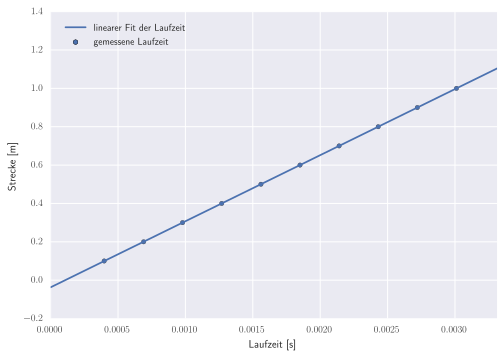

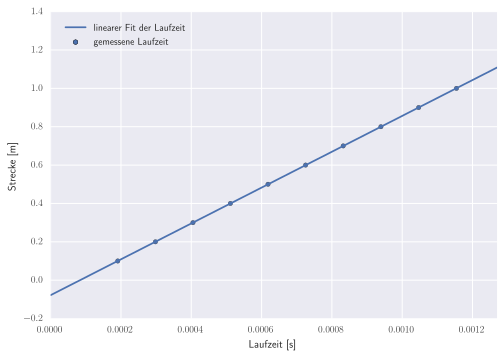

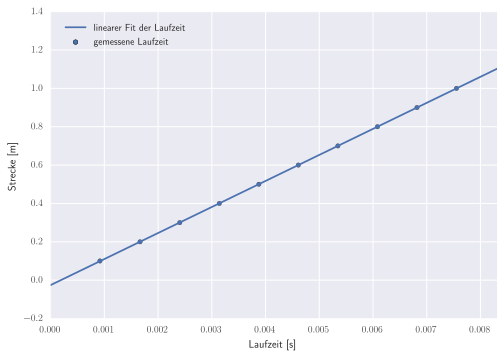

In [90]:
# Laufzeitenmethode Luft, Helium, SF6
import collections

# Read Data
dfb = pd.read_csv('data/laufzeitmethode.csv')
ax = None
i = 0
for gas1 in ['luft', 'helium', 'sf6']:
    df = dfb.loc[dfb['gas1'] == gas1].loc[dfb['gas2'] == gas1].loc[dfb['p'] == 1]
    slope, intercept, sem, r, p = stats.linregress(df['t'], df['s'])
    n = np.linspace(0.0, df['t'][9 + i * 10] * 1.2, 100)

    results[gas1] = {
        gas1: {

        }
    }
    results[gas1][gas1]['1_l_df'] = df
    results[gas1][gas1]['1_l_slope'] = slope
    results[gas1][gas1]['1_l_intercept'] = intercept
    results[gas1][gas1]['1_l_sem'] = sem
    
    ax = df.plot(kind='scatter', x='t', y='s', label='gemessene Laufzeit')
    plt.plot(n, [i * slope + intercept for i in n], label='linearer Fit der Laufzeit', axes=ax)
    plt.xlabel('Laufzeit [s]')
    plt.ylabel('Strecke [m]')
    plt.xlim([0, df['t'][9 + i * 10] * 1.1])
    plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
    plt.show()
    i += 1
#     plt.close()
#     figure = PrettyFigure(
#         ax.figure,
#         label='fig:laufzeiten_{}'.format(gas1),
#         caption='Laufzeiten in {}. Dazu einen linearen Fit um die Mittlere Geschwindigkeit zu bestimmen.'.format(gas1.title()))
#     figure.show()

## Resonanzmethode

Um eine anständige Messung zu kriegen, wurde zuerst eine Anfangsfrequenz bestimmt, bei welcher mindestens 3 konstruktive Interferenzen über die Messdistanz von einem Meter gemessen wurden. Da wurde dann eine Messung durchgeführt, sowie bei 5 weiteren, höheren Frequenzen.

Mit einem linearen Fit konnte dann vorzüglich die Schallgeschwindigkeit berechnet werden. Hierbei wurde die Formel in \ref{eq:rohr_offen_2} verwendet.

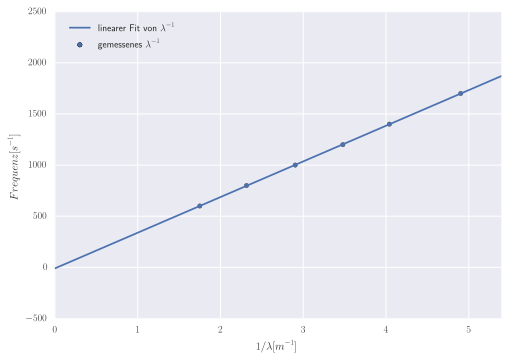

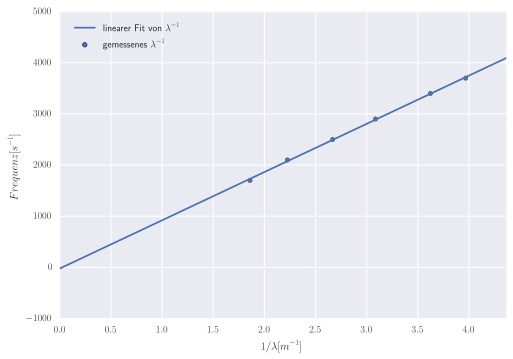

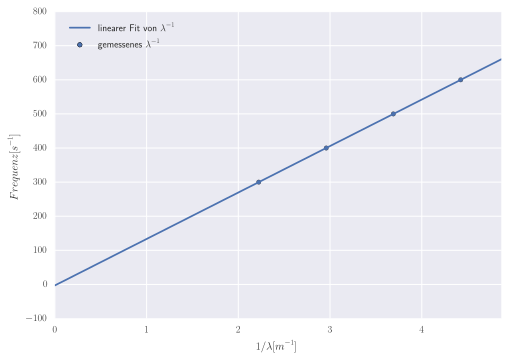

In [117]:
# Resonanzmethode Luft, Helium, SF6
import collections

# Read Data
dfb = pd.read_csv('data/resonanzfrequenz.csv')
ax = None
i = 0
for gas1 in ['luft', 'helium', 'sf6']:
    df = dfb.loc[dfb['gas1'] == gas1].loc[dfb['gas2'] == gas1].loc[dfb['p'] == 1]
    df['lbd'] = 1 / (df['s'] * 2)
    df['v'] = 2 * df['f'] * df['s']
    slope, intercept, sem, r, p = stats.linregress(df['lbd'], df['f'])
    n = np.linspace(0.0, df['lbd'][(5 + i * 6) if i < 2 else 15] * 1.2, 100)

    results[gas1][gas1]['1_r_df'] = df
    results[gas1][gas1]['1_r_slope'] = slope
    results[gas1][gas1]['1_r_intercept'] = intercept
    results[gas1][gas1]['1_r_sem'] = sem
    
    ax = df.plot(kind='scatter', x='lbd', y='f', label='gemessenes $\lambda^{-1}$')
    plt.plot(n, [i * slope + intercept for i in n], label='linearer Fit von $\lambda^{-1}$', axes=ax)
    plt.xlabel(r'$1 / \lambda [m^{-1}]$')
    plt.ylabel(r'$Frequenz [s^{-1}]$')
    plt.xlim([0, df['lbd'][(5 + i * 6) if i < 2 else 15] * 1.1])
    plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
    plt.show()
    i += 1
#     plt.close()
#     figure = PrettyFigure(
#         ax.figure,
#         label='fig:laufzeiten_{}'.format(gas1),
#         caption='Laufzeiten in {}. Dazu einen linearen Fit um die Mittlere Geschwindigkeit zu bestimmen.'.format(gas1.title()))
#     figure.show()

## Gasgemische

Bei diesem Versuch wurden Helium und SF6 mit $\frac{1}{5}$ Anteilen kombiniert.
Dafür wurde jeweils erst ein Gas bis einem Druck proportional zum jeweiligen Anteil eingelassen und darauf hin das zweite Gas.
Wie in \ref{eq:m_p} erklärt ist dies möglich.

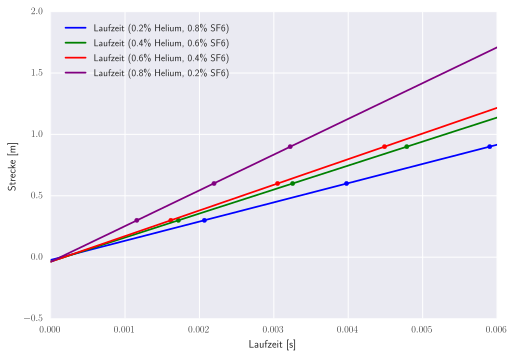

In [112]:
# Laufzeitenmethode Helium-SF6-Gemisch
import collections

# Read Data
dfb = pd.read_csv('data/laufzeitmethode.csv')
ax = None
colors = ['blue', 'green', 'red', 'purple']
results['helium']['sf6'] = {}
for i in range(1, 5):
    i /= 5
    df = dfb.loc[dfb['gas1'] == 'helium'].loc[dfb['gas2'] == 'sf6'].loc[dfb['p'] == i]
    slope, intercept, sem, r, p = stats.linregress(df['t'], df['s'])
    n = np.linspace(0.0, df['t'][29 + i * 15] * 2, 100)

    results['helium']['sf6']['0{}_l_df'.format(int(i * 10))] = df
    results['helium']['sf6']['0{}_l_slope'.format(int(i * 10))] = slope
    results['helium']['sf6']['0{}_l_intercept'.format(int(i * 10))] = intercept
    results['helium']['sf6']['0{}_l_sem'.format(int(i * 10))] = sem
    
    if i == 0:
        ax = df.plot(kind='scatter', x='t', y='s', label='gemessene Laufzeit', color=colors[int(i * 5) - 1])
    else:
        plt.scatter(df['t'], df['s'], axes=ax, label=None, color=colors[int(i * 5) - 1])
    plt.plot(n, [i * slope + intercept for i in n], label='Laufzeit ({:.1f}\% Helium, {:.1f}\% SF6)'.format(i, 1 - i), axes=ax, color=colors[int(i * 5) - 1])
    plt.xlabel('Laufzeit [s]')
    plt.ylabel('Strecke [m]')
    plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
    i += 0.2
plt.xlim([0, 0.006])
plt.show()
#     plt.close()
#     figure = PrettyFigure(
#         ax.figure,
#         label='fig:laufzeiten_{}'.format(gas1),
#         caption='Laufzeiten in {}. Dazu einen linearen Fit um die Mittlere Geschwindigkeit zu bestimmen.'.format(gas1.title()))
#     figure.show()

In [122]:
T = 21.3 + 273.15
Ri = 287
K = 1.402

results['luft']['luft']['berechnet'] = math.sqrt(K * Ri * T)
results['luft']['luft']['literatur'] = 343

Ri = 2078
K = 1.63

results['helium']['helium']['berechnet'] = math.sqrt(K * Ri * T)
results['helium']['helium']['literatur'] = 971

Ri = 2078
K = 1.63

results['sf6']['sf6']['berechnet'] = math.sqrt(K * Ri * T)
results['sf6']['sf6']['literatur'] = 129

cp1 = 0
cp2 = 0
cv1 = 0
cv2 = 0
RL1 = 0
RL2 = 0
m1 = 0.2
m2 = 0.8
s1 = (m1 * cp1) + (m2 * cp2)
s2 = (m1 + cv1) + (m2 * cv2)
s3 = (m1 + RL1) + (m2 * RL2)
results['helium']['sf6']['02_l_berechnet'] = math.sqrt(s1 / s2 * s3 * T)

m1 = 0.4
m2 = 0.6
s1 = (m1 * cp1) + (m2 * cp2)
s2 = (m1 + cv1) + (m2 * cv2)
s3 = (m1 + RL1) + (m2 * RL2)
results['helium']['sf6']['04_l_berechnet'] = math.sqrt(s1 / s2 * s3 * T)

m1 = 0.6
m2 = 0.4
s1 = (m1 * cp1) + (m2 * cp2)
s2 = (m1 + cv1) + (m2 * cv2)
s3 = (m1 + RL1) + (m2 * RL2)
results['helium']['sf6']['06_l_berechnet'] = math.sqrt(s1 / s2 * s3 * T)

m1 = 0.8
m2 = 0.2
s1 = (m1 * cp1) + (m2 * cp2)
s2 = (m1 + cv1) + (m2 * cv2)
s3 = (m1 + RL1) + (m2 * RL2)
results['helium']['sf6']['08_l_berechnet'] = math.sqrt(s1 / s2 * s3 * T)

# Fehlerrechnung

In diesem Versuch konnten Fehler 

# Resultate und Diskussion

## Reine Gase

Wie Tabelle \ref{tab:resultat_drehstoss} entnommen werden kann fallen die Resultate äusserst zufriedenstellend aus.
Bei der Laufzeitmethode sowie der Resonanzmethode in der Luft gibt es praktisch keine Abweichung (< 1%) von Literaturwerten.
Bei SF6 sieht es ähnlich aus. Beim Helium gibt es auf den Ersten Blick krassere Unterschiede. Wenn man aber genauer hinschaut, merkt man, dass die Werte insgesamt um Faktor 3 grösser sind als bei der Luftmessung und somit auch der Relative Fehler. Er er wird zwar ein wenig grösser, bleibt aber immernoch < 5%.

Spannend finde ich die Tatsache, dass die Resonanzmethode näher am Literaturwert liegt, da diese der Annahme nach ungenauer sein müsste. Bei Luft und SF6 war dies auch tatsächlich der Fall.

In [123]:
# Show results

values = [
    'Luft',
    'Helium',
    'SF6'
]
means_l = [
    '{0:.2f}'.format(results['luft']['luft']['1_l_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['1_l_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['1_l_slope']) + r'$\frac{m}{s}$'
]

means_r = [
    '{0:.2f}'.format(results['luft']['luft']['1_r_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['1_r_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['1_r_slope']) + r'$\frac{m}{s}$'
]

sem_l = [
    '{0:.2f}'.format(results['luft']['luft']['1_l_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['1_l_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['1_l_sem']) + r'$\frac{m}{s}$'
]

sem_r = [
    '{0:.2f}'.format(results['luft']['luft']['1_r_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['1_r_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['1_r_sem']) + r'$\frac{m}{s}$'
]

berechnet = [
    '{0:.2f}'.format(results['luft']['luft']['berechnet']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['berechnet']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['berechnet']) + r'$\frac{m}{s}$'
]

literatur = [
    '{0:.2f}'.format(results['luft']['luft']['literatur']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['helium']['literatur']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['sf6']['sf6']['literatur']) + r'$\frac{m}{s}$'
]

v2_results_tbl = PrettyTable(
    list(zip(values, means_l, sem_l, means_r, sem_r, berechnet, literatur)),
    label='tab:resultat_rein',
    caption='Resultate aus den Versuchen mit reinen Gasen.',
    extra_header=[
        'Wert',
        'mit Laufzeitmethode $v_{L}$',
        'statistischer Fehler',
        'mit Resonanzmethode $v_{R}$',
        'statistischer Fehler',
        'berechnet',
        'Literatur'
    ], entries_per_column=3)
v2_results_tbl.show()

Wert,mit Laufzeitmethode $v_{L}$,statistischer Fehler,mit Resonanzmethode $v_{R}$,statistischer Fehler,berechnet,Literatur
Luft,344.46$\frac{m}{s}$,1.00$\frac{m}{s}$,348.65$\frac{m}{s}$,1.00$\frac{m}{s}$,344.21$\frac{m}{s}$,343.00$\frac{m}{s}$
Helium,934.63$\frac{m}{s}$,1.00$\frac{m}{s}$,942.59$\frac{m}{s}$,1.00$\frac{m}{s}$,998.67$\frac{m}{s}$,971.00$\frac{m}{s}$
SF6,135.74$\frac{m}{s}$,1.00$\frac{m}{s}$,136.26$\frac{m}{s}$,1.00$\frac{m}{s}$,998.67$\frac{m}{s}$,129.00$\frac{m}{s}$


## Gasgemische

In der Tabelle \ref{tab:resultat_gasgemisch} kann einfach erkannt werden, dass

In [115]:
# Show results

values = [
    '20% / 80%',
    '40% / 60%',
    '60% / 40%',
    '80% / 20%'
]
means_x = [
    '{0:.2f}'.format(results['helium']['sf6']['02_l_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['04_l_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['06_l_slope']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['08_l_slope']) + r'$\frac{m}{s}$'
]

sem_x = [
    '{0:.2f}'.format(results['helium']['sf6']['02_l_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['04_l_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['06_l_sem']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['08_l_sem']) + r'$\frac{m}{s}$'
]

berechnet_x = [
    '{0:.2f}'.format(results['helium']['sf6']['02_l_berechnet']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['04_l_berechnet']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['06_l_berechnet']) + r'$\frac{m}{s}$',
    '{0:.2f}'.format(results['helium']['sf6']['08_l_berechnet']) + r'$\frac{m}{s}$'
]

v2_results_tbl = PrettyTable(
    list(zip(values, means_x, sem_x, berechnet_x)),
    label='tab:resultat_gasgemisch',
    caption='Resultate aus dem Versuch mit den Gasgemischen.',
    extra_header=[
        'Helium / SF6',
        'mit Laufzeitmethode $v_{L}$',
        'statistischer Fehler',
        'berechnet',
    ], entries_per_column=4)
v2_results_tbl.show()

Helium / SF6,mit Laufzeitmethode $v_{L}$,statistischer Fehler,berechnet
20% / 80%,156.46$\frac{m}{s}$,1.00$\frac{m}{s}$,0.00$\frac{m}{s}$
40% / 60%,195.42$\frac{m}{s}$,1.00$\frac{m}{s}$,0.00$\frac{m}{s}$
60% / 40%,208.91$\frac{m}{s}$,1.00$\frac{m}{s}$,0.00$\frac{m}{s}$
80% / 20%,291.10$\frac{m}{s}$,1.00$\frac{m}{s}$,0.00$\frac{m}{s}$
